### **Introdução**


Grupo:  
        Bruno Hideo Kadooka - RA: 1997360 - 
        Erick Alen Ricioli - RA:205927 - 
        Leonardo Rodrigues Ribeiro - RA: 1835785


Dataset: Iris - Biologo e estatistico: Ronald Fisher (Artigo em 1936);

3 Classes ou targets: Iris-Setosa, Iris-Versicolor e Virginica;

4 dimensões: Altura e Comprimento das pétalas e sépalas;

150 amostras ou dados, sendo 50 para cada classe;


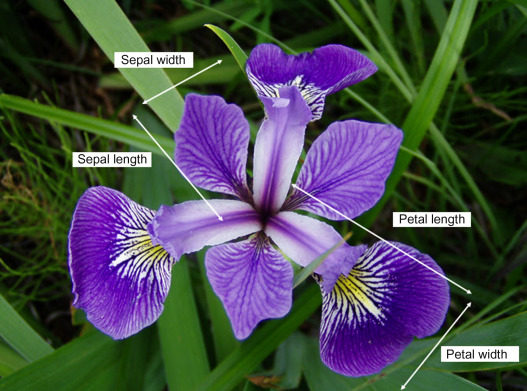

fonte: https://www.sciencedirect.com/topics/mathematics/virginica

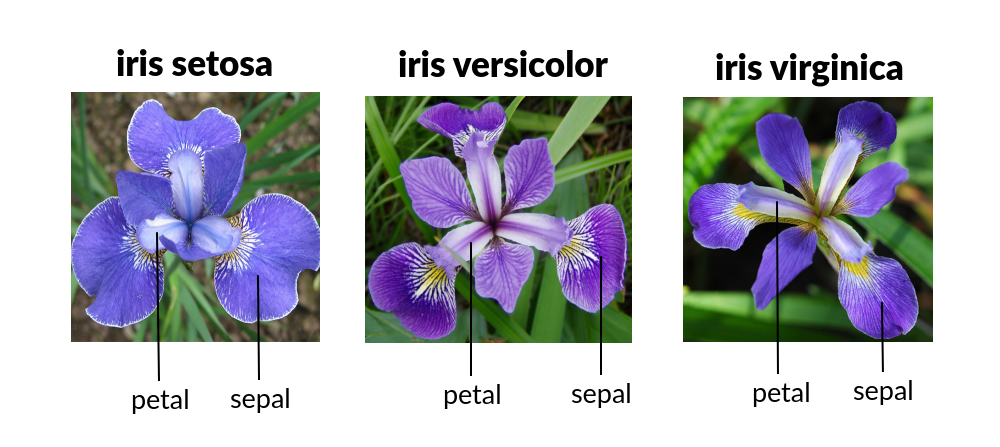

Fonte:https://medium.com/@Locemarn/an%C3%A1lise-de-dados-explorat%C3%B3rios-iris-flower-dataset-611cb68fb78e




Exercicio 1: Baixar a base de dados do kaggle (IRIS) listadas no pdf do professor

In [ ]:
import pandas as pd

#Dados e variaveis globais
iris = pd.read_csv('/content/dados/Iris.csv', sep=',', decimal='.', encoding='ISO-8859-1')
iris_df = iris.copy()

data_col = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']

X_iris = iris_df[data_col].values #X
y_iris = iris_df['label'].values  #y

X_iris_df = pd.DataFrame(X_iris, columns=data_col) 
y_iris_df = pd.DataFrame(y_iris, columns=['target'])
iris_target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']



Exercicio 2: Apresentar a matriz de dispersão entre os parametros das amostras do dataset. Sendo a diagonal principal com histograma e no restante da matriz a dispersão dos dados:

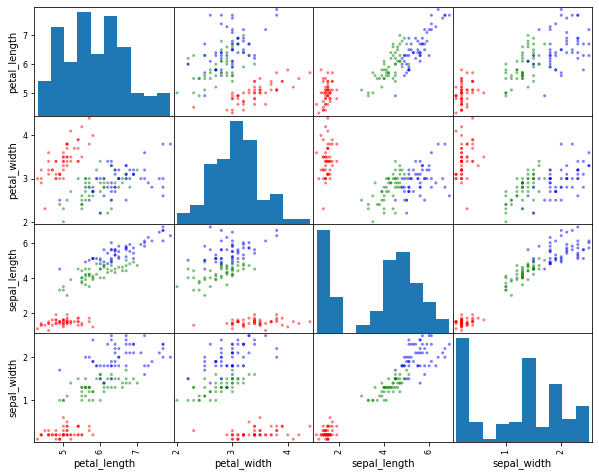

In [ ]:
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline

colors = {'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'} #Separamos cada flor por cor
colors_scatter = list(map(lambda x:colors.get(x), iris['label']))
scatter = scatter_matrix(iris[data_col], diagonal='hist', c=colors_scatter, figsize = (10, 8))


Exercício 3: Apresentar o boxplot

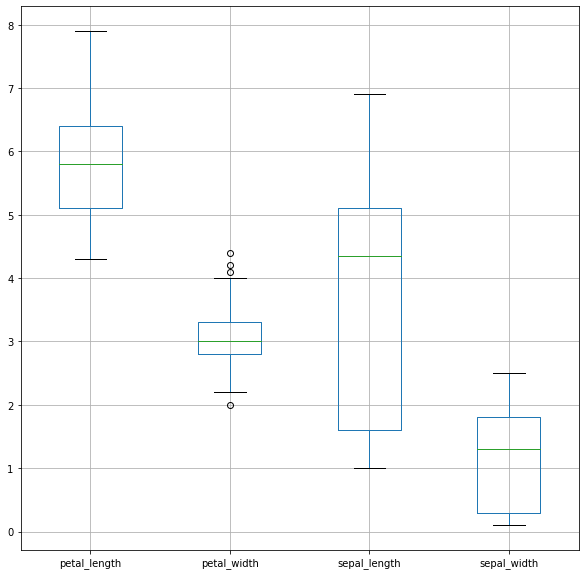

In [ ]:
X_iris_df.boxplot(figsize = (10,10))

Exercicio 4: Utilizar os dados para treinamento do modelo de machine learning (O escolhido foi o KNN) - Atenção não foi escolhido outro modelo pois o tempo de apresentação é curto.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#random_state default = None
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3)

#Funcao do knn parametro de nro de vizinhos
def machine_knn (k_vizinhos):
  clf = KNeighborsClassifier(n_neighbors = k_vizinhos)
  return clf

classificacao = machine_knn(10)

classificacao.fit(X_train, y_train)

y_predict = classificacao.predict(X_test)


Exercicio 5: Apresentar a matriz confusão dos resultados do conjunto de teste

In [ ]:
confusion_matrix(y_test, y_predict)

array([[15,  0,  0],
       [ 0, 16,  0],
       [ 0,  5,  9]])

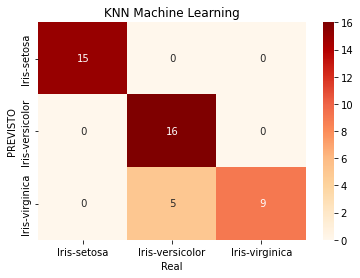

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), cmap='OrRd', annot=True, fmt='2.0f', xticklabels=iris_target_names, yticklabels=iris_target_names)
plt.title('KNN Machine Learning')
plt.ylabel('PREVISTO')
plt.xlabel('Real')
plt.show()obs

Para a apresentação das métricas de desempenho, utilizamos o método de validação cruzada para ter uma métrica mais próxima da realidade.

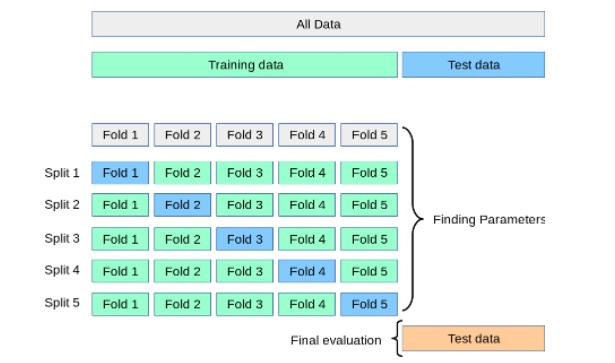

Fonte: https://scikit-learn.org/stable/modules/cross_validation.html?highlight=cross_validation

In [ ]:
nro_repeticao = 5

from sklearn.model_selection import cross_val_score

def validacao_cruzada (nro_repeticao, metrica):
  scores = cross_val_score(classificacao, X_iris, y_iris, cv = nro_repeticao, scoring = metrica)
  return scores


Exercicio 6: Apresentar Acurácia, Precisão, Revocação e F1-Score do conjunto de teste

In [ ]:
from sklearn.metrics import classification_report
dados = {
    'acuracia': validacao_cruzada(nro_repeticao, 'accuracy').mean(),
    'f1-score': validacao_cruzada(nro_repeticao, 'f1_macro').mean(),
    'precisao': validacao_cruzada(nro_repeticao, 'precision_macro').mean(),
    'revocacao':validacao_cruzada(nro_repeticao, 'recall_macro').mean()
}

dados

{'acuracia': 0.9800000000000001,
 'f1-score': 0.9799832915622388,
 'precisao': 0.9806060606060605,
 'revocacao': 0.9800000000000001}

## **Referencias Bibliograficas**

http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html

https://data-flair.training/blogs/iris-flower-classification/#:~:text=Iris%20flower%20classification%20is%20a,'%2C%20'Petal%20width'.

https://www.youtube.com/watch?v=BrFEmO-zPuA Iris Flower Classification, machine learning project for beginners using python

https://towardsdatascience.com/pair-plot-and-pairgrid-in-details-f782975032ea

KNN: https://www.w3resource.com/machine-learning/scikit-learn/iris/python-machine-learning-k-nearest-neighbors-algorithm-exercise-4.php

https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75


Confusão: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#examples-using-sklearn-metrics-confusion-matrix

Precisão: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

Revocação: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#examples-using-sklearn-metrics-recall-score

Acurácia: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

F1Score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#examples-using-sklearn-metrics-f1-score
